In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler as SS
SS=SS()
from sklearn.preprocessing import *
import importlib.util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

In [2]:
spec = importlib.util.spec_from_file_location("DataPreprocessing", "/home/admin1/PycharmProjects/Machine_learning_Python/Utility/DataPreprocessing.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
preprocess_obj = foo.DataPreprocessing()

Data PreProcessign object created successfully


In [3]:
dataframe = pd.read_csv("Data/bike_sharing.csv",sep=',')

In [4]:
dataframe.sample()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14979,14980,2012-09-21,3,1,9,8,0,5,1,1,0.54,0.5152,0.73,0.1343,31,726,757


In [5]:
dataframe.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
X = pd.DataFrame(dataframe[['temp','cnt']])

In [7]:
X= X.rename(columns={'temp':'x','cnt':'y'})

In [8]:
X.shape

(17379, 2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b0af51d68>,
      dtype=object)

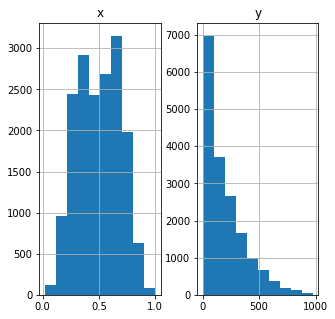

In [9]:
X.hist(figsize=(5,5))

In [10]:
X.describe()

,x,y
count,17379.000000,17379.000000
mean,0.496987,189.463088
std,0.192556,181.387599
min,0.020000,1.000000
25%,0.340000,40.000000
50%,0.500000,142.000000
75%,0.660000,281.000000
max,1.000000,977.000000


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 2 columns):
x    17379 non-null float64
y    17379 non-null int64
dtypes: float64(1), int64(1)
memory usage: 271.6 KB


In [12]:
X.isna().sum()

x    0
y    0
dtype: int64

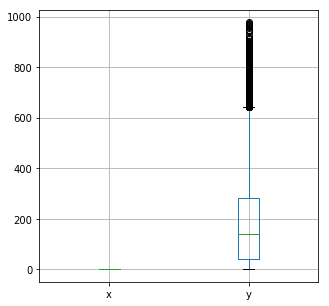

In [13]:
X.boxplot(figsize=(5,5))

In [14]:
X.shape

(17379, 2)

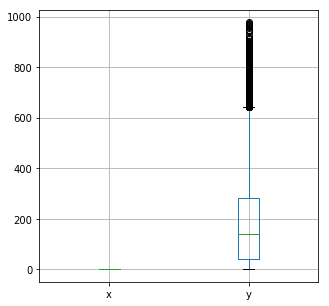

In [15]:
X.boxplot(figsize=(5,5))

In [16]:
X = preprocess_obj.remove_outlier(X)

In [17]:
X.isna().sum()

x      0
y    244
dtype: int64

In [18]:
X = X.dropna()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b0ad82748>,
      dtype=object)

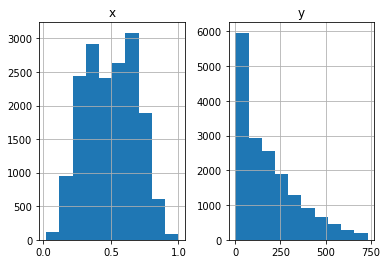

In [19]:
X.hist()

In [20]:
X.describe()

,x,y
count,17135.000000,17135.000000
mean,0.494417,180.490516
std,0.192284,166.101082
min,0.020000,1.000000
25%,0.340000,39.000000
50%,0.500000,139.000000
75%,0.640000,273.000000
max,1.000000,733.000000


In [21]:
# n = Normalizer().fit(np.array(X['cnt']).reshape(-1,1))
# for item in X:
#     X[item]=n.fit_transform(np.array(X[item]).reshape(-1,1))

In [22]:
X.describe()

,x,y
count,17135.000000,17135.000000
mean,0.494417,180.490516
std,0.192284,166.101082
min,0.020000,1.000000
25%,0.340000,39.000000
50%,0.500000,139.000000
75%,0.640000,273.000000
max,1.000000,733.000000


In [23]:
# trying with scaling the output too output :
# Y = X['y']
rs = RobustScaler().fit(X)
for item in X:
    X[item]=rs.fit_transform(np.array(X[item]).reshape(-1,1))
# X['y']=Y

In [24]:
# for item in X:
#     sns.distplot(X[item])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b087a7f60>,
      dtype=object)

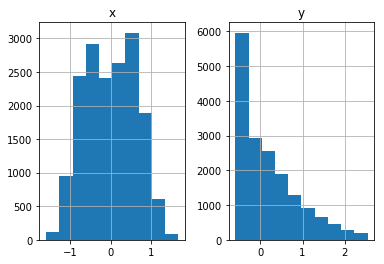

In [25]:
X.hist()

Accuracy is  57.66001867336219 %

mae: 0.503836383048612, mse: 0.42339981326637804


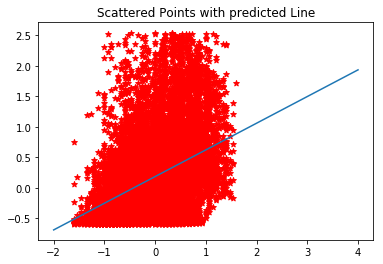

In [26]:
class Simple_Linear_regression:
    
    def init(self):
        print("In simple linear regression")
    
    def Simple_linear_regression_demo(self,dataframe):
        Y_train = dataframe['y']
        traindata = dataframe.drop('y', axis=1)
        #split the data
        traindata, test_data, Y_train,  Y_test = train_test_split(traindata,Y_train,test_size = 0.3, random_state=0)
        linear_reg = LinearRegression()
        linear_reg.fit(traindata,Y_train)
        Ypred = linear_reg.predict(test_data)
        error_mae = mean_absolute_error(Ypred,Y_test)
        error_rmse = mean_squared_error(Ypred,Y_test)        
        Accuracy = (1-error_rmse)*100
        plt.scatter(traindata,Y_train,marker='*',color='r')
        plt.plot([-2,4],linear_reg.predict(np.array([-2,4]).reshape(2,1)))
        plt.title('Scattered Points with predicted Line')
        print("Accuracy is ",Accuracy,'%\n')
        print("mae: {}, mse: {}".format(error_mae,error_rmse))
    
    def main(self,dataframe):
        self.Simple_linear_regression_demo(dataframe)

if __name__ == '__main__':
    obj = Simple_Linear_regression()
    obj.main(X)